k=2, Silhouette Score=0.4149
k=3, Silhouette Score=0.4508
k=4, Silhouette Score=0.3490
k=5, Silhouette Score=0.3309
k=6, Silhouette Score=0.3275
k=7, Silhouette Score=0.2344
k=8, Silhouette Score=0.2272
k=9, Silhouette Score=0.2012


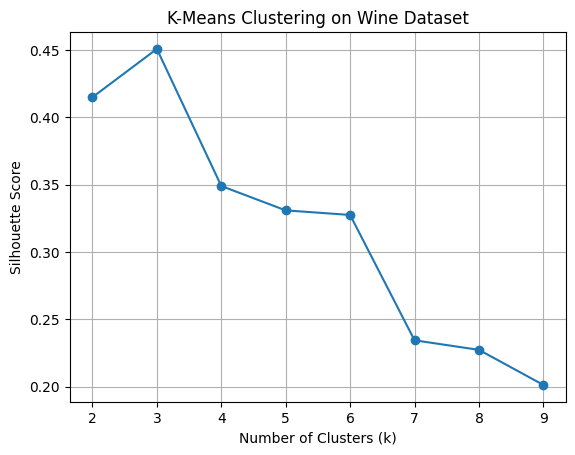

In [9]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt


# Start Spark
spark = SparkSession.builder.appName("Wine K-Means Clustering").getOrCreate()

# Load and clean data
data = spark.read.csv('wine-clustering.csv', header=True, inferSchema=True).na.drop()

# Assemble and scale
features = [c for c in data.columns if c.lower() not in ['label', 'id']]
assembled = VectorAssembler(inputCols=features, outputCol="features").transform(data)
scaled = StandardScaler(inputCol="features", outputCol="standardized").fit(assembled).transform(assembled)

# K-means clustering for k = 2–9
evaluator = ClusteringEvaluator(featuresCol='standardized', metricName='silhouette')
scores = []
for k in range(2, 10):
    model = KMeans(featuresCol='standardized', k=k, seed=42).fit(scaled)
    score = evaluator.evaluate(model.transform(scaled))
    scores.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")

# Plot
plt.plot(range(2,10), scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("K-Means Clustering on Wine Dataset")
plt.grid(True)
plt.show()